# Goggle playstore Data
### Complete EDA analysis for Beginners to Advance

# About Dataset

- `Description`
  This Data Set Was downloaded from Kaggle, from the following [Link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

`Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

`Content`
Each app (row) has values for catergory, rating, size, and more.

`Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

`Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 2. Data Loading and Exploration | Cleaning

- ` Let's load csv file`

In [2]:
df = pd.read_csv("./Dataset/googleplaystore.csv")

- `Let's have a look on top 5 rows of data`

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# set options to be maximum for rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#hide all warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
print(f"The number of columns in this dataset are as follows: {df.columns}")

The number of columns in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}")

The Number of Rows are 10841, and columns are 13


In [7]:
#Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#Summary statistics of Dataframe only for numeric columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **Observations**

___
1. There are 10841 rows and columns in the dataset
2. The columns are of different data type
3. The columns in the dataset are:
     - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
     'Current Ver', 'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object datatype but they should br of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'`


# How to make size a numeric column?

In [9]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
# Observation:
1. "Veries with device"
2. M
3. k
---

In [10]:
#Checking missing values in Size
df["Size"].isnull().sum()

np.int64(0)

- `No missing values in Size, we are good to go.`

#### Verify the number of values and  different kinds of values

In [11]:
#find the values having M in item
df["Size"].loc[df["Size"].str.contains("M")].value_counts().sum()

np.int64(8829)

In [12]:
# find values having k in them
df["Size"].loc[df["Size"].str.contains("k")].value_counts().sum()

np.int64(316)

In [13]:
# find values having veries with device in them
df["Size"].loc[df["Size"].str.contains("Varies with device")].value_counts().sum()

np.int64(1695)

In [14]:
#Length of Dataframe
len(df)

10841

In [15]:
#sum values of M, K and Varies with device
8830+316+1695

10841

In [16]:
# Convert the whole size column into bytes

#let's define a function

def convert_size(Size):
    if isinstance(Size, str):
        if "k" in Size:
            return float(Size.replace("k", "")) * 1024

        elif 'M' in Size:
            return float(Size.replace("M", "")) * 1024 *1024

        elif "varies with device" in Size:
            return np.nan 

    return Size               

In [17]:
#let's apply this function
df["Size"] = df["Size"].apply(convert_size)

In [18]:
df["Size"]

0                19922944.0
1                14680064.0
2                 9122611.2
3                26214400.0
4                 2936012.8
5                 5872025.6
6                19922944.0
7                30408704.0
8                34603008.0
9                 3250585.6
10               29360128.0
11               12582912.0
12               20971520.0
13               22020096.0
14               38797312.0
15                2831155.2
16                5767168.0
17               17825792.0
18               40894464.0
19               32505856.0
20               14680064.0
21               12582912.0
22                4404019.2
23                7340032.0
24               24117248.0
25                6291456.0
26               26214400.0
27                6396313.6
28                4823449.6
29                4404019.2
30                9646899.2
31                5452595.2
32               11534336.0
33               11534336.0
34                4404019.2
35                96

In [19]:
# rename the column
df.rename(columns = {"Size" : "Size_in_bytes"}, inplace= True)

In [20]:
print(df["Size_in_bytes"].dtype)

object


In [21]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
#Convert column to numeric (safe conversion)
df["Size_in_bytes"] = pd.to_numeric(df["Size_in_bytes"], errors="coerce")

#Create the Size_in_mb column
df["Size_in_Mb"] = df["Size_in_bytes"].apply(lambda x: x / (1024 *1024))

#Create size in Kb
df["Size_in_Kb"] =df["Size_in_bytes"].apply(lambda x:x / (1024))

In [23]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


# `Installs Column`

# Let's take care of unique values

In [24]:
#Unique values in Install column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', nan], dtype=object)

In [25]:
#Missing values in Install column
df["Installs"].isnull().sum()

np.int64(1)

In [26]:
#Checking data type of Install column
print(df["Installs"].dtypes)

object


1. Remove + sign
2. remove ,
3. convert the column into integer

In [27]:
#Checking type of Installs
print(df["Installs"].dtypes)

object


##### `Find how many values has '+' in it`

##### `Remove the + sign in Installs Column`

In [28]:
df["Installs"]= df["Installs"].apply(lambda x: x.replace("+", "") if "+" in str(x) else x)

##### `Remove , sign in Installs Column`

In [29]:
df["Installs"] =df["Installs"].apply(lambda x: x.replace(",", "") if "," in str(x) else x)

##### `Convert Installs Column to numeric`

In [30]:
df["Installs"] =pd.to_numeric(df["Installs"], errors= "coerce"  )

##### `Checking missing values in Installs column`

In [31]:
df["Installs"].isna().sum()


np.int64(1)

##### `Fill missing values with 0`

In [32]:
df["Installs"] = df["Installs"].fillna(0)

##### `Converting Installs column into int`

In [33]:
df["Installs"] = df["Installs"].apply(lambda x : int(x))

In [34]:
#Value Counts in Installs Column
df["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

In [35]:
#maximum values in Installs column
df["Installs"].max()

np.int64(1000000000)

In [36]:
#making a new column called 'installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels =['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df["Installs_category"] = pd.cut(df["Installs"], bins= bins, labels= labels)

In [37]:
#value counts of new column
df["Installs_category"].value_counts()

Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              698
Very low               535
no                      16
Name: count, dtype: int64

# `Price Column`

In [38]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', nan, '$1.20', '$1.04'], dtype=object)

In [39]:
#Value count of Price column
df["Price"].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

In [40]:
#let's see how many values have $ sign
df["Price"].loc[df["Price"].str.contains("$", na= False)].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

In [41]:
#Convert Price Column to String
df["Price"] = df["Price"].astype(str)

In [42]:
#This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign

df["Price"].loc[(df["Price"].str.contains("0")) & (~df["Price"].str.contains("\$"))].value_counts().sum()

np.int64(10040)

In [43]:
# Remove dollar signs from the "Price" column in the DataFrame
# If a value contains a dollar sign, replace it with an empty string;
# otherwise, keep the value unchanged.
df["Price"] = df["Price"].apply(lambda x: x.replace("$", "")if "$" in str(x) else(x))

In [44]:
#Value counts
df['Price'].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
3.49          7
29.99         7
7.99          7
24.99         7
5.49          6
19.99         6
12.99         5
6.49          5
8.99          5
11.99         5
2.00          3
10.00         3
16.99         3
1.00          3
7.49          2
17.99         2
8.49          2
10.99         2
79.99         2
9.00          2
39.99         2
1.70          2
3.95          2
13.99         2
33.99         2
15.99         1
1.50          1
400.00        1
74.99         1
25.99         1
3.88          1
4.84          1
1.76          1
3.02          1
4.77          1
1.59          1
2.50          1
1.29          1
1.61          1
5.00          1
299.99        1
37.99         1
379.99        1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [45]:
#Now we convert this into numeric value
df["Price"] = df["Price"].apply(lambda x: float(x))

In [46]:
#converting Reviews column to numeric
df["Reviews"]=pd.to_numeric(df["Reviews"], errors= "coerce")

In [47]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [48]:
#Using f string print min, max and average prices of app
print(f"Min price is {df["Price"].min()}")
print(f"Max price is {df["Price"].max()}")
print(f"Average price is {df["Price"].mean()}")

Min price is 0.0
Max price is 400.0
Average price is 1.027368081180812


# `Checking Missing values` 

In [49]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1696
Size_in_Kb           1696
Size_in_Mb           1696
Rating               1474
Installs_category     130
Current Ver             8
Android Ver             3
Reviews                 1
Category                1
Price                   1
Type                    1
App                     0
Installs                0
Last Updated            0
Content Rating          0
Genres                  0
dtype: int64

In [50]:
#Find missing value percentage in data
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size_in_bytes        15.644313
Size_in_Kb           15.644313
Size_in_Mb           15.644313
Rating               13.596532
Installs_category     1.199151
Current Ver           0.073794
Android Ver           0.027673
Reviews               0.009224
Category              0.009224
Price                 0.009224
Type                  0.009224
App                   0.000000
Installs              0.000000
Last Updated          0.000000
Content Rating        0.000000
Genres                0.000000
dtype: float64

In [51]:
#Find total number of missing values
df.isnull().sum().sum()

np.int64(6707)

<Axes: >

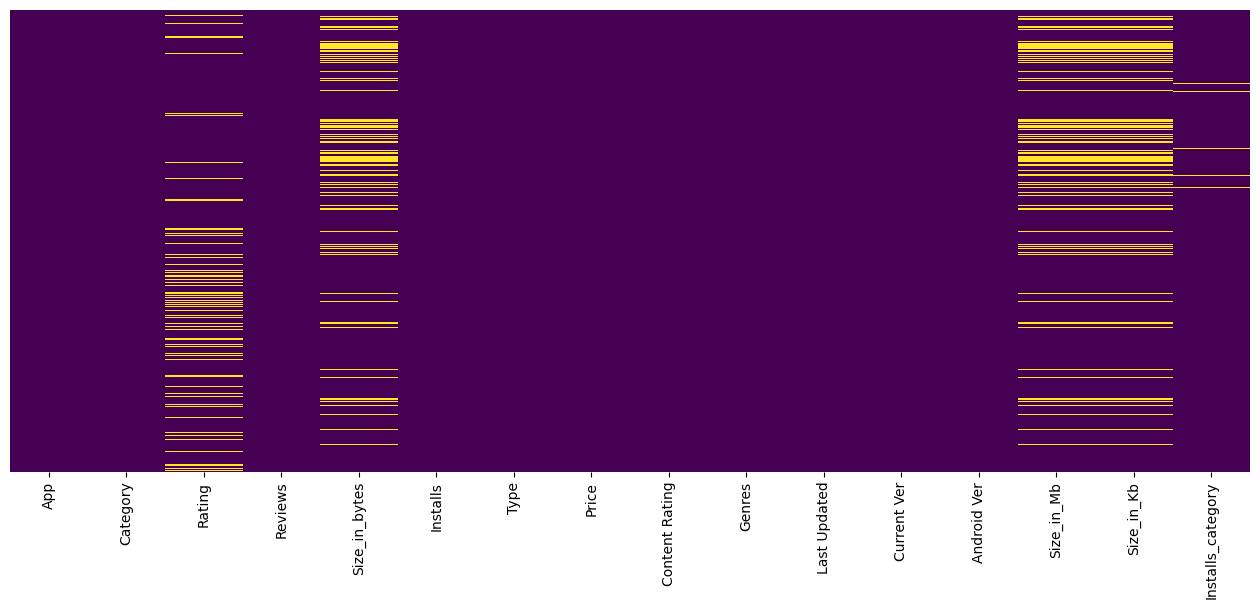

In [52]:
#plot missing values
plt.figure(figsize= (16, 6))
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= "viridis")

Text(0.5, 1.0, 'Percentage of missing values in each column')

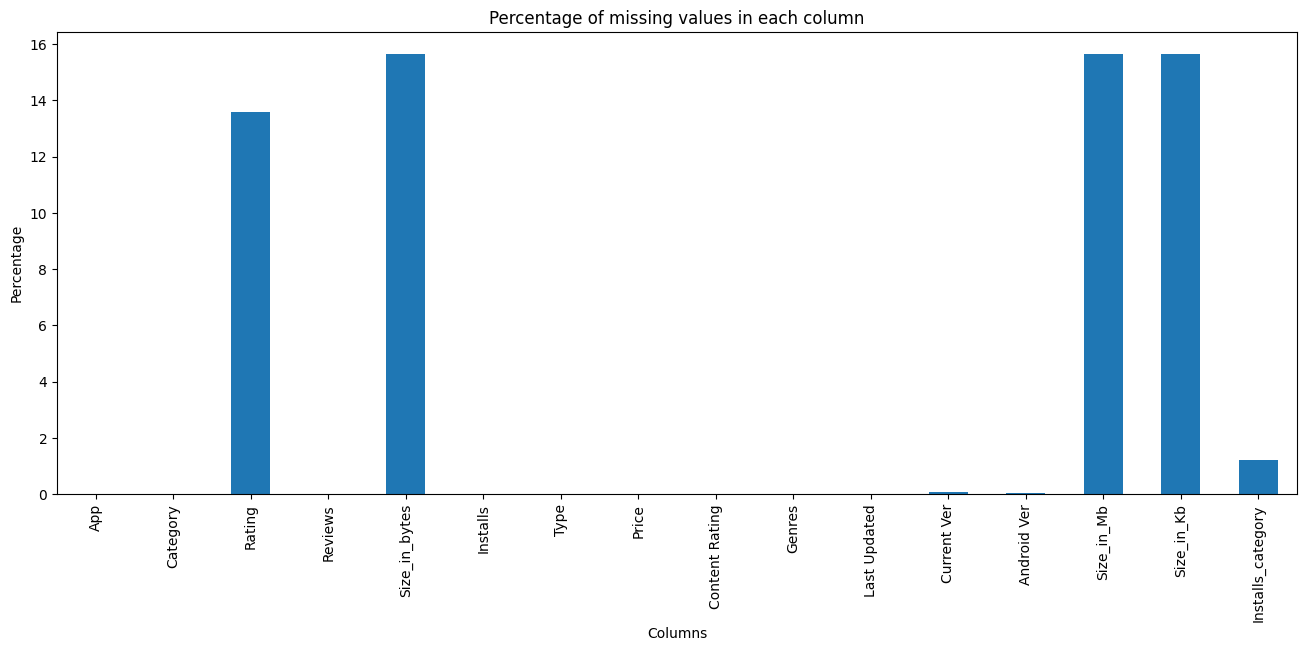

In [53]:
#make fig size
plt.figure(figsize=(16,6))
#plot null values by their percentage in easch column

missing_percentage= df.isnull().sum() /len(df) *100
missing_percentage.plot(kind ="bar")
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title("Percentage of missing values in each column")

<Axes: >

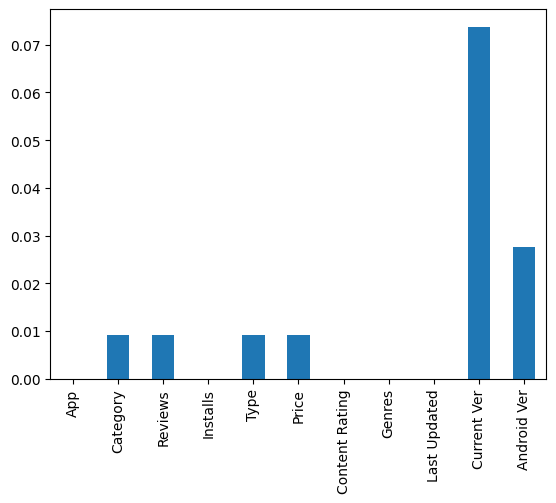

In [54]:
#missing values less than 1 percent
missing_percentage[missing_percentage < 1].plot(kind= "bar")


<Axes: >

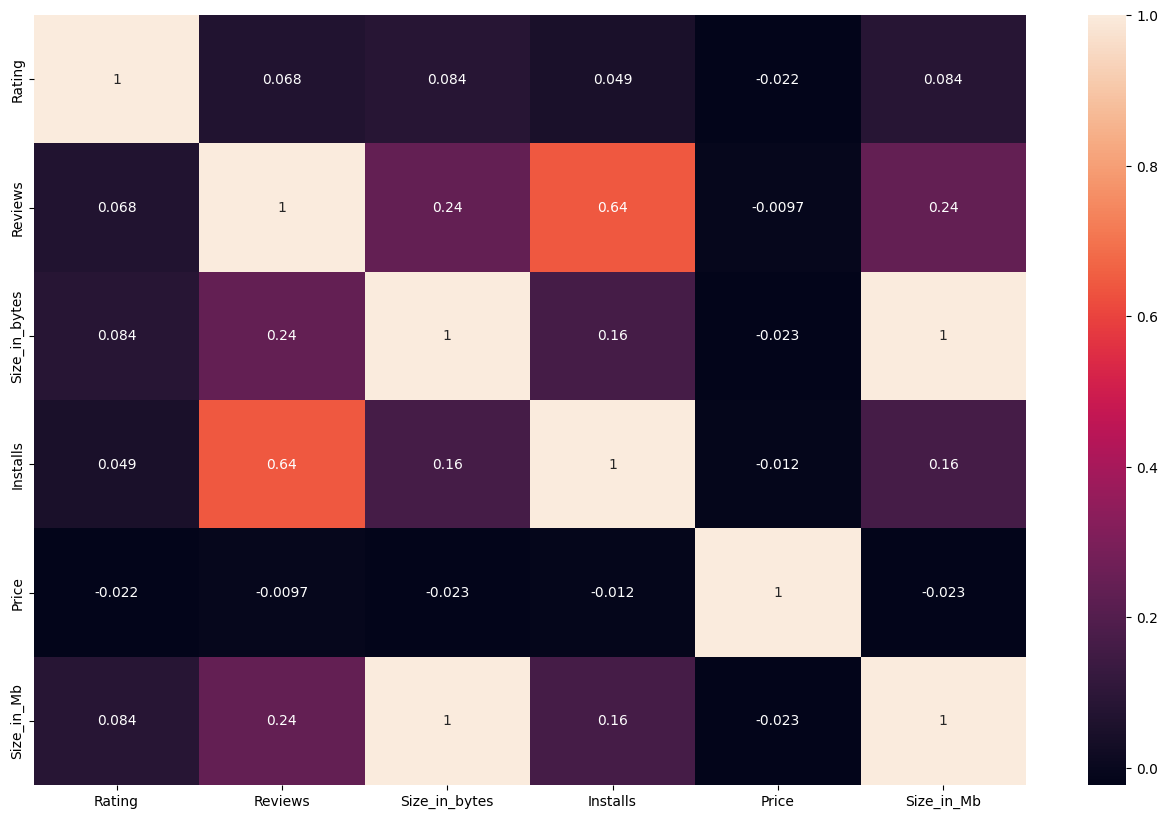

In [55]:
# Make a correlation matrix of numeric values
plt.figure(figsize=(16,10))
numeric_cols = ["Rating", "Reviews", "Size_in_bytes", "Installs", "Price", "Size_in_Mb"]
sns.heatmap(df[numeric_cols].corr(), annot=True) #plot the correlation matrix

In [56]:
#we can also calculate the orrelation matrix using pandf[numeric_cols].corr()
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068141,0.083737,0.048652,-0.021903,0.083737
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.238214
Size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000
Installs,0.048652,0.643122,0.164787,1.000000,-0.011689,0.164787
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000,-0.023007
Size_in_Mb,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000


In [57]:
#pip install scipy
from scipy import stats

#remove rows containing NaN or infinite values (Important to calculate person's R)
df_clean = df.dropna()

#calculate person's R between Rating and Installs
pearson_r, _=stats.pearsonr(df_clean["Reviews"], df_clean["Installs"])
print(f"Pearson's R between Reviews and Installs : {pearson_r:.4f}")

Pearson's R between Reviews and Installs : 0.6194


In [58]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 1
Size_in_bytes        1696
Installs                0
Type                    1
Price                   1
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             3
Size_in_Mb           1696
Size_in_Kb           1696
Installs_category     130
dtype: int64

In [59]:
#length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [60]:
#remove the rows having null values in the "Current Ver", "Android Ver", "Category", "Reviews", "Type", "Genres"
df.dropna(subset=["Current Ver", "Android Ver", "Category", "Reviews", "Type", "Genres"], inplace= True)

In [61]:
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- ##### we have remove `12` rows having null values in the `"Current Ver", "Android Ver", "Category", "Reviews", "Type", "Genres"`

In [62]:
# lets check null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Kb           1694
Size_in_Mb           1694
Rating               1469
Installs_category     130
Reviews                 0
Category                0
App                     0
Price                   0
Type                    0
Installs                0
Content Rating          0
Current Ver             0
Last Updated            0
Genres                  0
Android Ver             0
dtype: int64

In [63]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_Kb',
       'Installs_category'],
      dtype='object')

In [64]:
#use groupby function to find the trend of rating in each Installs_category
df.groupby("Installs_category")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8


In [65]:
# in which Installs_category the rating has NaN values
df["Installs_category"].loc[df["Rating"].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

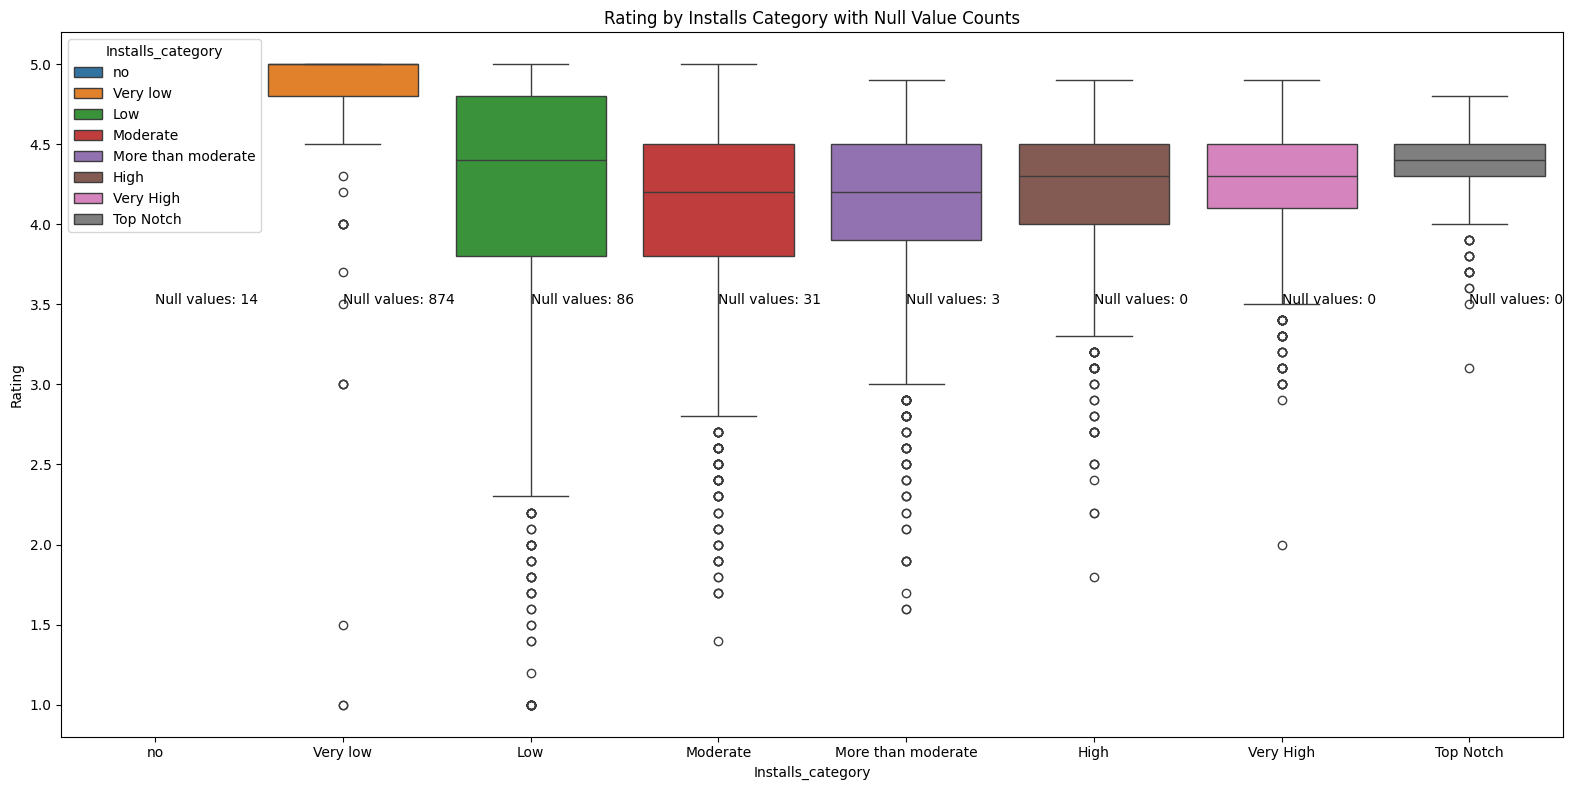

In [66]:
# Properly set figure size
plt.figure(figsize=(16, 8))

# Create boxplot
sns.boxplot(x="Installs_category", y="Rating", hue= "Installs_category", data=df)

# Add null value annotations
plt.text(0, 3.5, "Null values: 14")
plt.text(1, 3.5, "Null values: 874")
plt.text(2, 3.5, "Null values: 86")
plt.text(3, 3.5, "Null values: 31")
plt.text(4, 3.5, "Null values: 3")
plt.text(5, 3.5, "Null values: 0")
plt.text(6, 3.5, "Null values: 0")
plt.text(7, 3.5, "Null values: 0")

# Rotate x-axis labels for better readability
plt.title("Rating by Installs Category with Null Value Counts")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [67]:
df["Installs_category"].loc[df["Reviews"].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

# `Handling Missing Values in columns`

In [68]:
df.isnull().sum()

App                     0
Category                0
Rating               1469
Reviews                 0
Size_in_bytes        1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Size_in_Mb           1694
Size_in_Kb           1694
Installs_category     130
dtype: int64

In [69]:
#Total values in Rating
df["Rating"].count()

np.int64(9360)

In [70]:
#Fill the missing values of Rating with Average
df["Rating"].fillna(df["Rating"].mean(), inplace= True)

### `Handling Size_in_bytes`

In [71]:
#total values in size_in_bytes
df["Size_in_bytes"].count()

np.int64(9135)

In [72]:
# Fill missing values in 'Size_in_bytes' by replacing them with the median size of each app Category
df["Size_in_bytes"] = df.groupby("Category")["Size_in_bytes"].transform(
    lambda x: x.fillna(x.median())
)

In [73]:
df["Size_in_bytes"].value_counts()

Size_in_bytes
20971520.0     351
19922944.0     279
12582912.0     277
13631488.0     268
14680064.0     252
10485760.0     236
15728640.0     213
11534336.0     203
41943040.0     191
18874368.0     178
4404019.2      163
17825792.0     160
16777216.0     159
6291456.0      156
27262976.0     149
7444889.6      147
26214400.0     143
22020096.0     138
25165824.0     136
24117248.0     117
23068672.0     114
30408704.0     103
10276044.8      97
28311552.0      97
29360128.0      95
9175040.0       85
31457280.0      84
8912896.0       80
34603008.0      79
3460300.8       77
38797312.0      76
36700160.0      72
32505856.0      70
3040870.4       69
2411724.8       68
10171187.2      68
2621440.0       68
3565158.4       68
9646899.2       67
7549747.2       66
2936012.8       65
3879731.2       63
7969177.6       63
33554432.0      63
35651584.0      63
3984588.8       62
4089446.4       62
46137344.0      61
4194304.0       61
3145728.0       61
37748736.0      60
9489612.8       6

# `Handling Size_in_mb and Kb`

In [74]:
# Fill missing values in 'Size_in_Kb' by replacing them with the median size of each app Category
df["Size_in_Kb"] = df.groupby("Category")["Size_in_Kb"].transform(
    lambda x: x.fillna(x.median())
)

In [75]:
# Fill missing values in 'Size_in_Mb' by replacing them with the median size of each app Category
df["Size_in_Mb"] = df.groupby("Category")["Size_in_Mb"].transform(
    lambda x: x.fillna(x.median())
)

In [76]:
df.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size_in_bytes          0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
Size_in_Mb             0
Size_in_Kb             0
Installs_category    130
dtype: int64

# `Handling Installs_category`

In [77]:
#Checking orignal values counts of Installs_category
df["Installs_category"].count()

np.int64(10699)

In [78]:
# Fill missing values in 'Installs_category' with the most frequent category (mode)
df["Installs_category"].fillna(df["Installs_category"].mode()[0], inplace =True)

# `Using Plots`

<Axes: xlabel='Installs_category', ylabel='Reviews'>

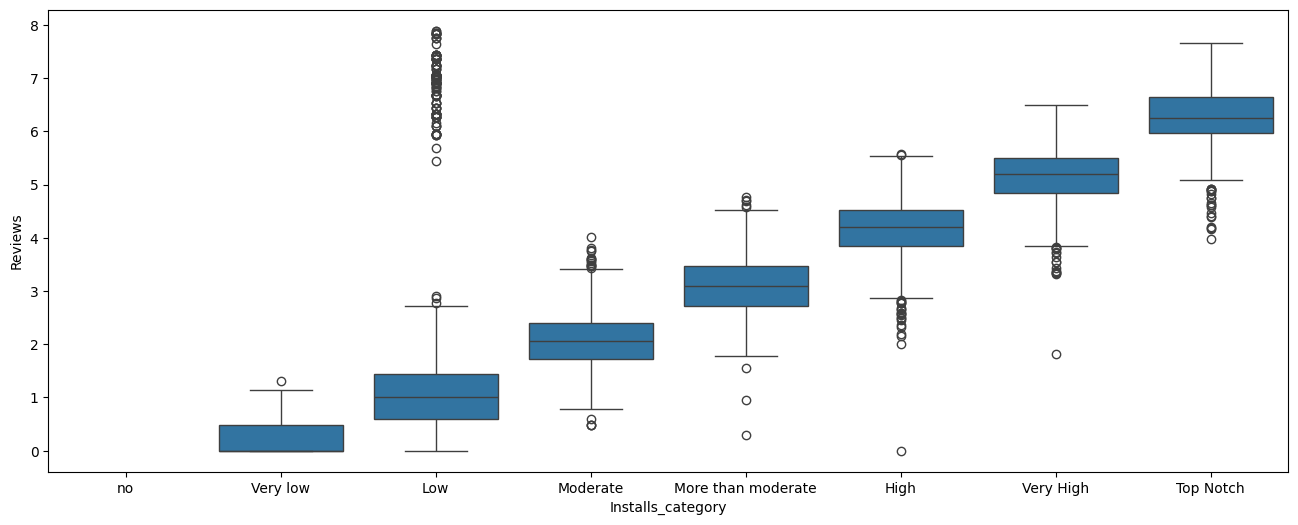

In [79]:
#lets plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6))
sns.boxplot(x= "Installs_category", y = np.log10(df["Reviews"]), data= df)

<Axes: xlabel='Rating', ylabel='Reviews'>

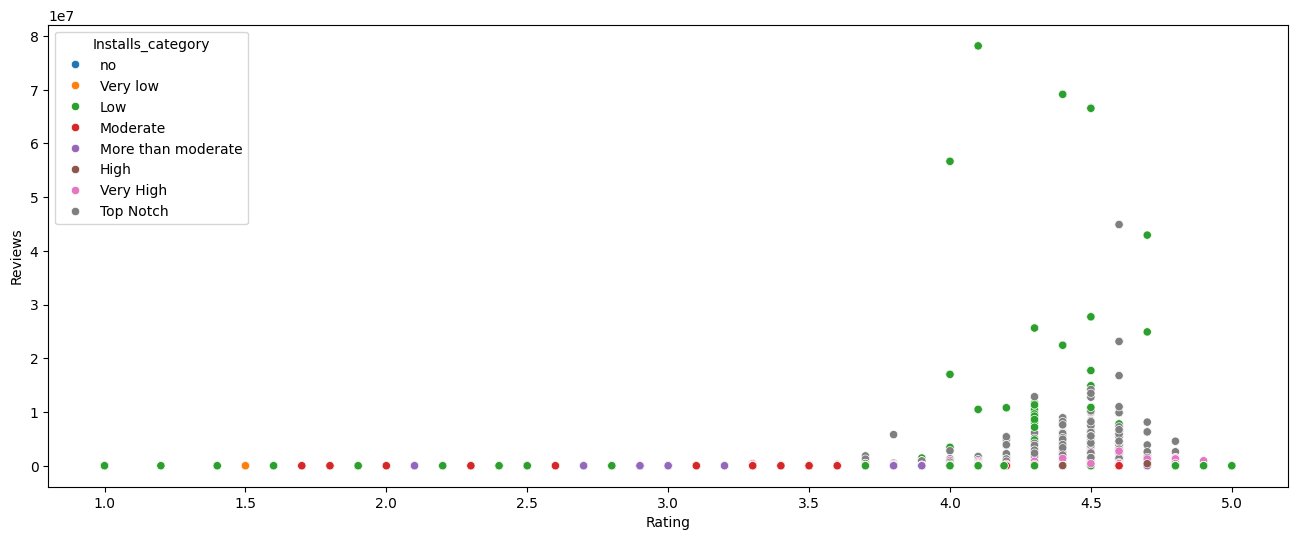

In [80]:
#Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16,6))
sns.scatterplot(x= "Rating", y='Reviews', hue= "Installs_category", data= df)

<Axes: xlabel='Reviews', ylabel='Installs'>

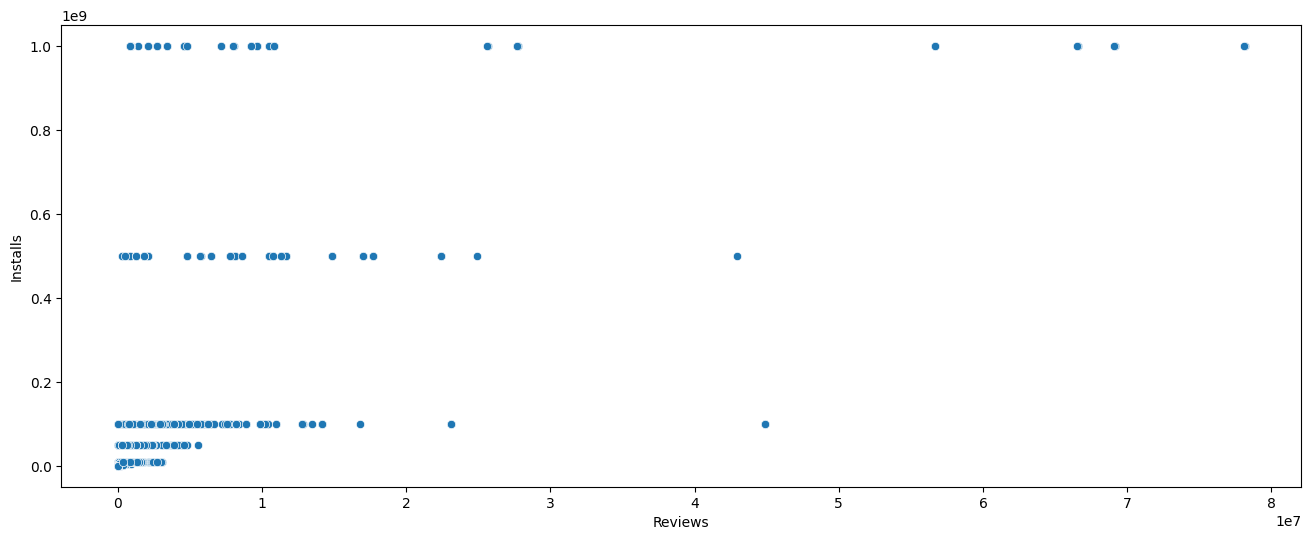

In [81]:
#plot reviews and Installs in a scatter plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x= "Reviews", y= "Installs", data= df)

<Axes: xlabel='Reviews', ylabel='Installs'>

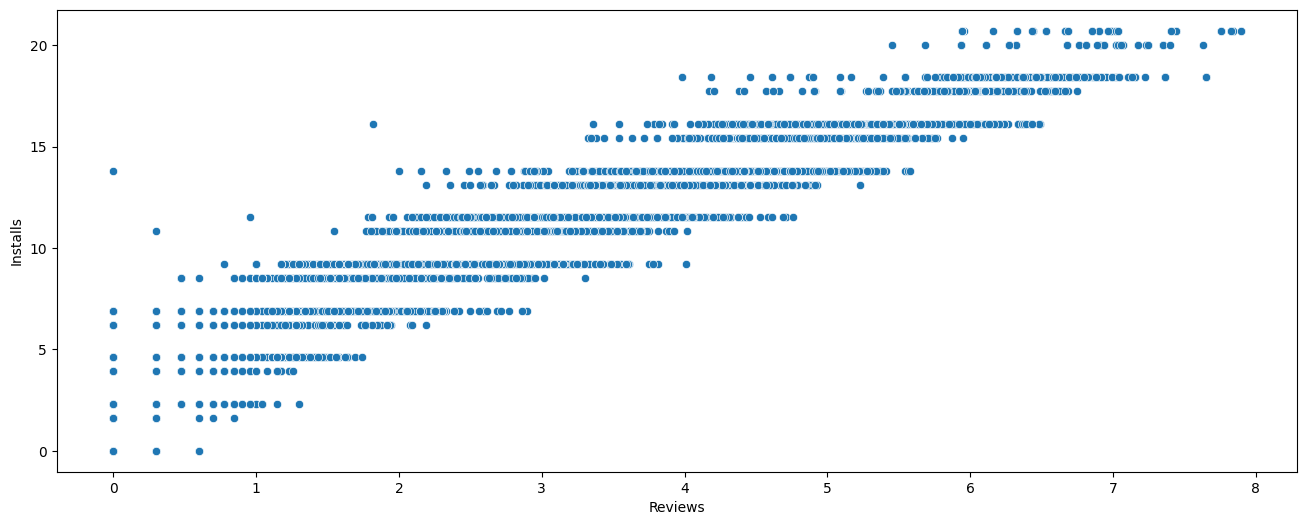

In [82]:
plt.figure(figsize=(16,6))
sns.scatterplot(x= np.log10(df["Reviews"]), y= np.log(df["Installs"]), data=df)

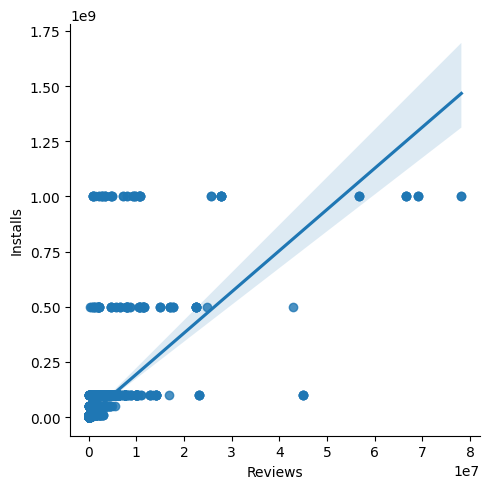

In [83]:
#plot reviews and installs in a scatter plot with trend line
plt.Figure(figsize=(16,6))
sns.lmplot(x= "Reviews", y= "Installs", data= df)

# `Duplicates`

- Removing duplicates is one of the most important part of data wrangling process, we must remove the duplicates in order to get correct insights from the data.
- if you do not remove duplicates from dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measure such as mean, median, and standard deviatiion, and can lead over represnation of data poinst. 

In [84]:
#find duplicates if any
df.duplicated().sum()

np.int64(483)

In [85]:
df["App"].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 duplicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [86]:
# let's check the number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are : {df[col].duplicated().sum()}")

Number of duplicates in App column are : 1181
Number of duplicates in Category column are : 10796
Number of duplicates in Rating column are : 10789
Number of duplicates in Reviews column are : 4830
Number of duplicates in Size_in_bytes column are : 10369
Number of duplicates in Installs column are : 10809
Number of duplicates in Type column are : 10827
Number of duplicates in Price column are : 10737
Number of duplicates in Content Rating column are : 10823
Number of duplicates in Genres column are : 10710
Number of duplicates in Last Updated column are : 9453
Number of duplicates in Current Ver column are : 7998
Number of duplicates in Android Ver column are : 10796
Number of duplicates in Size_in_Mb column are : 10369
Number of duplicates in Size_in_Kb column are : 10369
Number of duplicates in Installs_category column are : 10821


In [87]:
df[df["App"].duplicated(keep= False)].sort_values(by="App")

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,3891.2,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,3891.2,High
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160.0,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,26624.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160.0,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,26624.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12.0,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,3891.2,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12.0,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,3891.2,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506.0,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,15360.0,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506.0,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,15360.0,More than moderate
3083,365Scores - Live Scores,SPORTS,4.600000,666521.0,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,25600.0,Very High
5415,365Scores - Live Scores,SPORTS,4.600000,666246.0,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,25600.0,Very High


In [88]:
#remove duplicates
df.drop_duplicates(inplace= True)

In [89]:
#print number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

# **Insights from Data**

# **Which category has the highest number of Apps?**

In [90]:
#which category has highest number of apps
df["Category"].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **Which cateogy has highest number of Installs?**

In [91]:
#Category with highest number of installs
df.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **Which category has the highest number of reviews?**

In [92]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,More than moderate


In [93]:
df.tail()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,55574528.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,53.0,54272.0,Moderate
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3774873.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3.6,3686.4,Low
10838,Parkinson Exercices FR,MEDICAL,4.191838,3.0,9961472.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9.5,9728.0,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,7969177.6,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,7.6,7782.4,Low
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307.0,19922944.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,19.0,19456.0,Very High


In [94]:
#category with highest number of reviews
df.groupby("Category")["Reviews"].sum().sort_values(ascending=False).head(10)

Category
GAME               1.415537e+09
COMMUNICATION      6.012736e+08
SOCIAL             5.335768e+08
FAMILY             3.967717e+08
TOOLS              2.731810e+08
PHOTOGRAPHY        2.042974e+08
VIDEO_PLAYERS      1.103802e+08
PRODUCTIVITY       1.025545e+08
SHOPPING           9.493116e+07
PERSONALIZATION    7.519274e+07
Name: Reviews, dtype: float64

# **Which Category has the highest rating?**

In [95]:
#category with highest average rating
df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

Category
EDUCATION              4.374553
ART_AND_DESIGN         4.368367
EVENTS                 4.363202
BOOKS_AND_REFERENCE    4.312120
PERSONALIZATION        4.304568
PARENTING              4.281973
GAME                   4.277535
BEAUTY                 4.260570
HEALTH_AND_FITNESS     4.251441
SOCIAL                 4.246808
SHOPPING               4.245627
WEATHER                4.239547
SPORTS                 4.219001
PRODUCTIVITY           4.200010
FAMILY                 4.191330
AUTO_AND_VEHICLES      4.190612
MEDICAL                4.184889
PHOTOGRAPHY            4.183395
LIBRARIES_AND_DEMO     4.182580
HOUSE_AND_HOME         4.168776
FOOD_AND_DRINK         4.168170
COMMUNICATION          4.157974
COMICS                 4.156395
NEWS_AND_MAGAZINES     4.140500
ENTERTAINMENT          4.136036
BUSINESS               4.135406
FINANCE                4.135136
LIFESTYLE              4.113525
TRAVEL_AND_LOCAL       4.107337
VIDEO_PLAYERS          4.074729
TOOLS                  4.065777

<Axes: xlabel='Rating', ylabel='Density'>

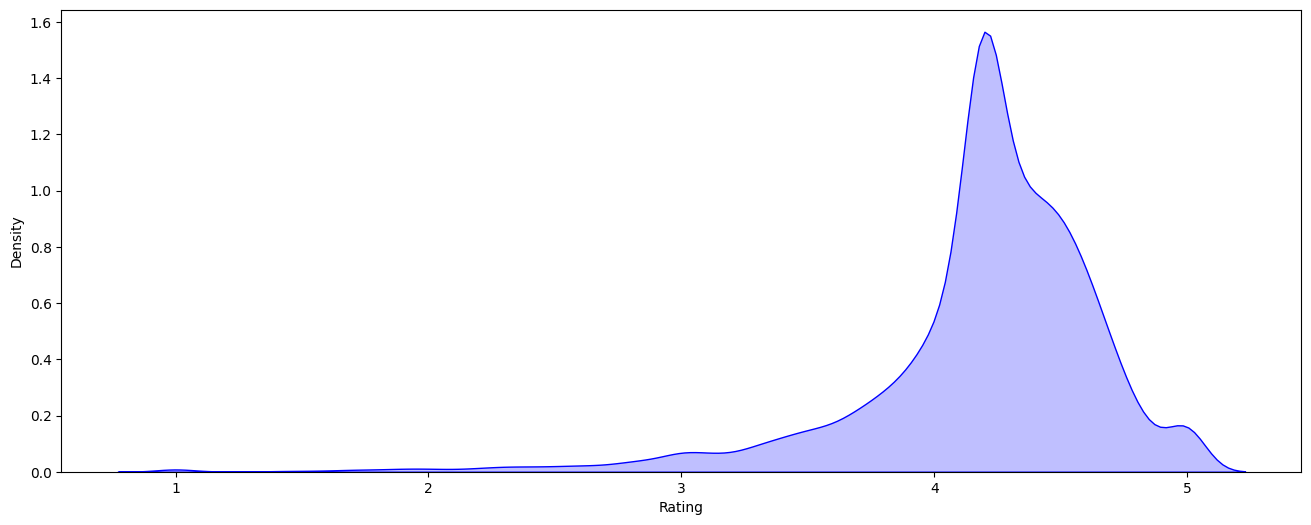

In [96]:
#plot the rating distribution
plt.figure(figsize= (16,6))
sns.kdeplot(df["Rating"], color= "blue", shade= True)

<Axes: xlabel='Installs', ylabel='Price'>

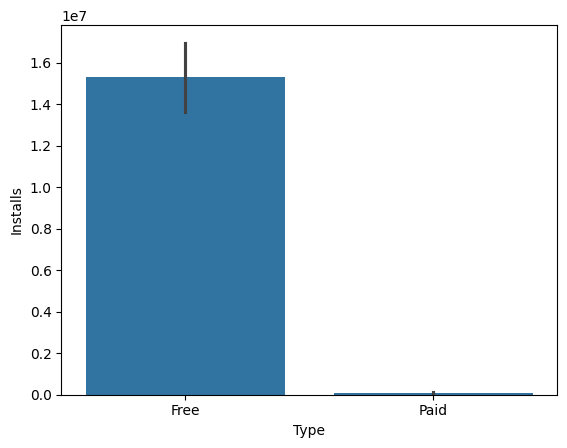

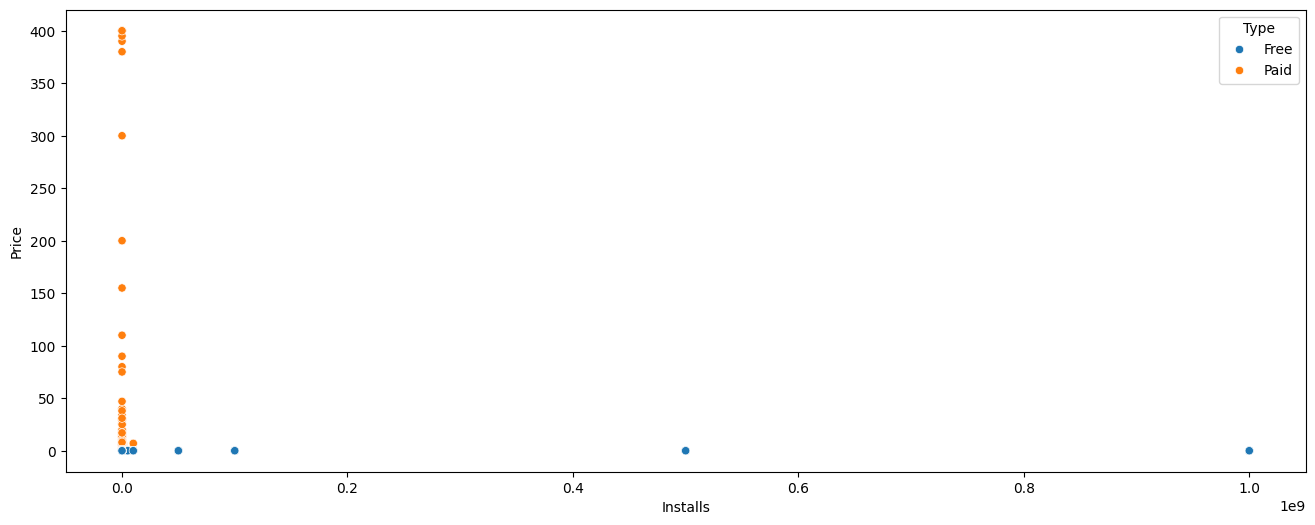

In [97]:
#plot number of installs for free vs paid aps make a bar plot
plt.Figure(figsize=(16,6))
sns.barplot(x="Type", y= "Installs", data= df) #plot the bar

#show scatter plot as well where x-axis is Installs and y-axis is price and hue is type
plt.figure(figsize=(16,6))
sns.scatterplot(x= "Installs", y= "Price", hue= "Type", data= df)

In [98]:
#Number of Free and paid Installation
free_installs = df[df['Type'] == 'Free']['Installs'].sum()
paid_installs = df[df['Type'] == 'Paid']['Installs'].sum()

print("Free app installs:", free_installs)
print("Paid app installs:", paid_installs)

Free app installs: 146561162546
Paid app installs: 69174871


<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

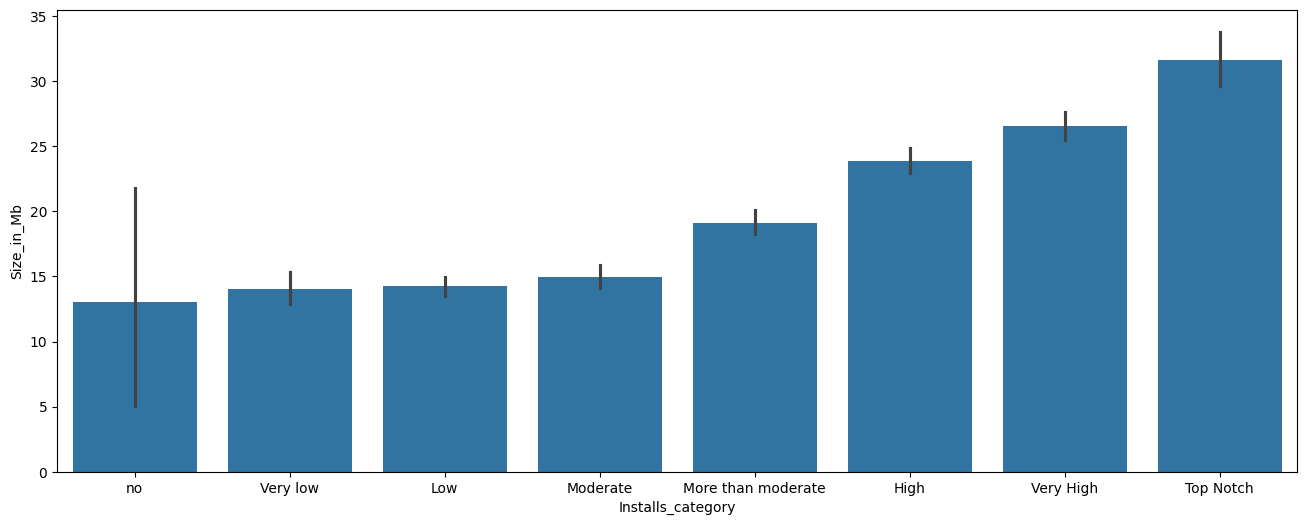

In [99]:
# check if there is any impact of size on Installs
#make a abr plot of size_in_Mb vs Installs_category
plt.figure(figsize=(16,6))
sns.barplot(x= "Installs_category" ,y= "Size_in_Mb", data= df)

In [100]:
# which content rating is most popular in Installs
df["Content Rating"].value_counts() #this will show the value counts of each content ating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

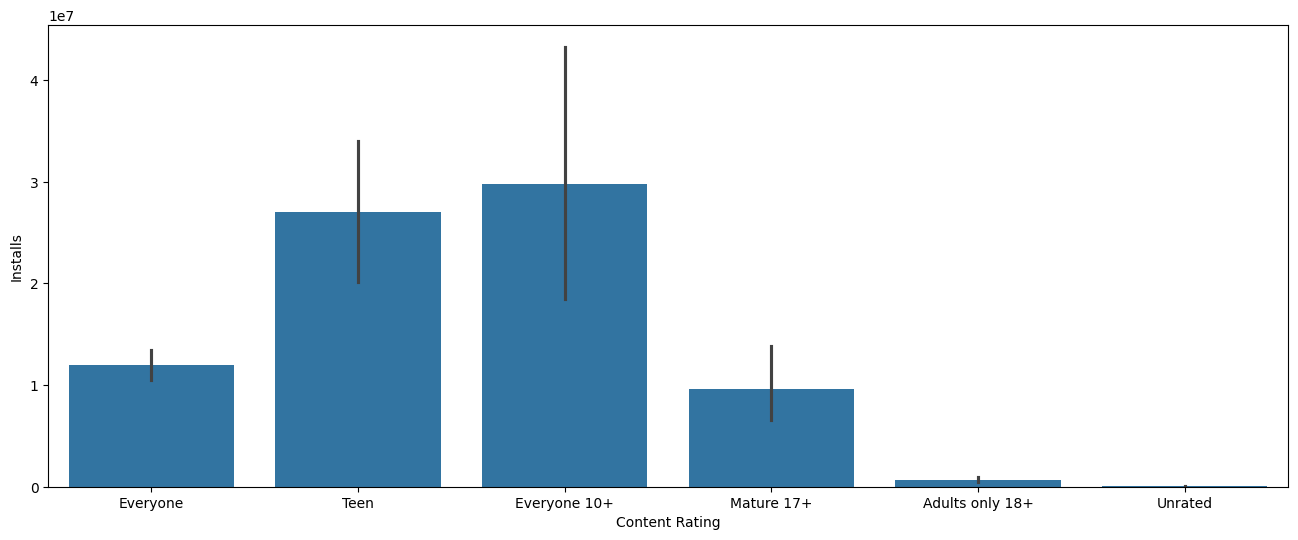

In [101]:
#plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16,6))
sns.barplot(x= "Content Rating", y="Installs", data= df)

In [102]:
#find how many apps are there in everyone content rating
df["Category"].loc[df["Content Rating"] == "Everyone"].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

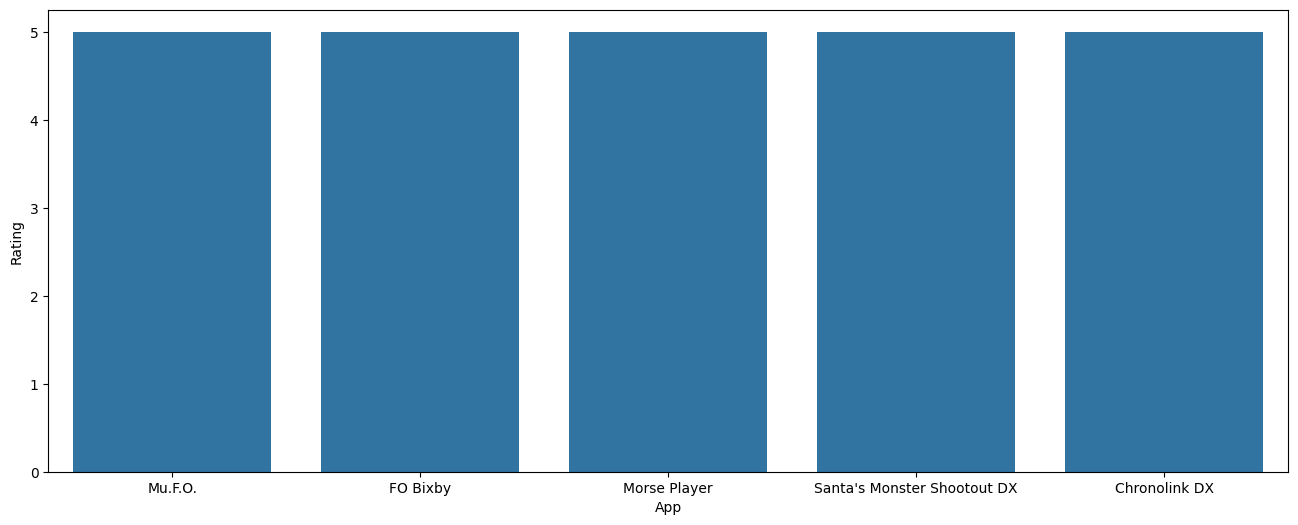

In [103]:
# plot of 5 rated paid apps
plt.figure(figsize=(16,6))
sns.barplot(x= "App", y="Rating", data= df[df["Type"] == "Paid"].sort_values(by="Rating", ascending= False).head())

<Axes: xlabel='App', ylabel='Rating'>

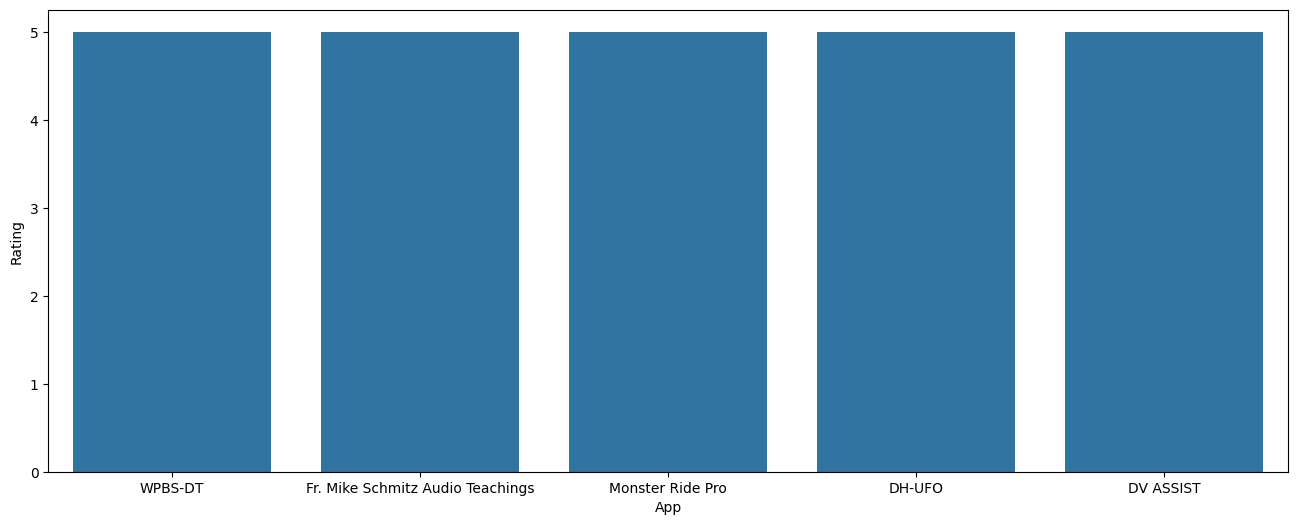

In [104]:
#plot of top rated free apps
plt.figure(figsize=(16,6))
sns.barplot(x= "App", y= "Rating", data= df[df["Type"] == "Free"].sort_values(by = "Rating", ascending= False).head())

In [105]:
df[df["Type"] == "Free"].sort_values(by= "Rating", ascending= False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
8861,WPBS-DT,FAMILY,5.0,3.0,6606028.8,500,Free,0.0,Everyone,Entertainment,"April 3, 2015",4.1.1,2.3.3 and up,6.3,6451.2,Low
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3774873.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3.6,3686.4,Low
10776,Monster Ride Pro,GAME,5.0,1.0,25165824.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,24.0,24576.0,Very low
8411,DH-UFO,FAMILY,5.0,1.0,61865984.0,100,Free,0.0,Everyone,Entertainment,"May 24, 2018",1.0.9,4.4 and up,59.0,60416.0,Low
8955,DV ASSIST,FAMILY,5.0,1.0,18874368.0,100,Free,0.0,Everyone,Education,"August 2, 2018",1.0,4.4 and up,18.0,18432.0,Low


<Axes: xlabel='App', ylabel='Reviews'>

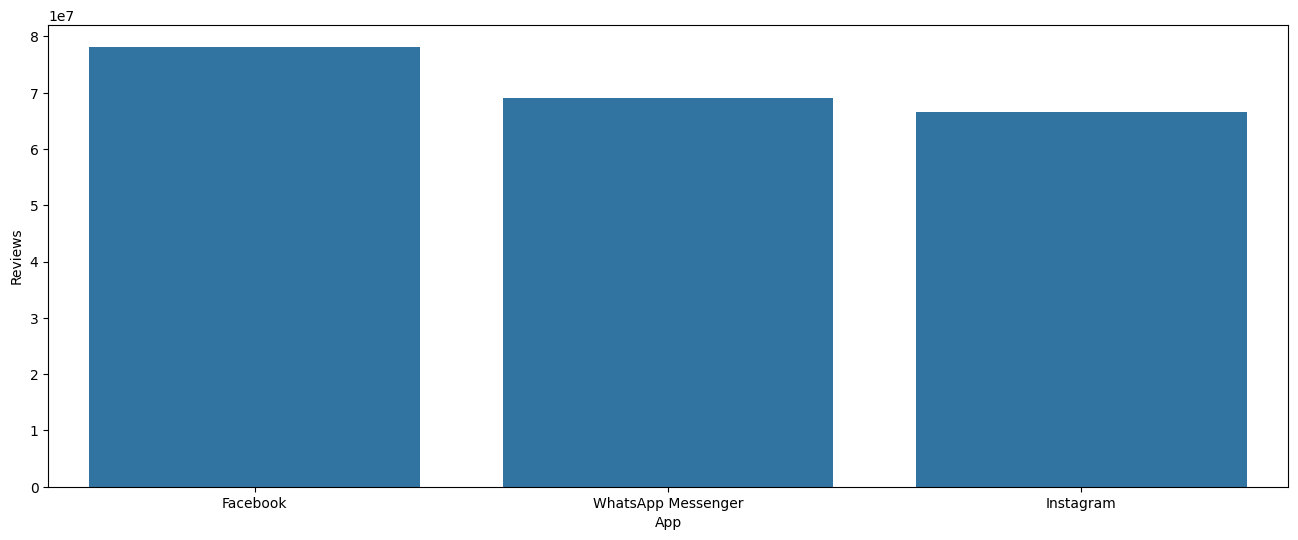

In [106]:
#plot top 5 Free apps with highest number of reviews
plt.figure(figsize=(16,6))
sns.barplot(x= "App", y="Reviews", data=df[df["Type"] == "Free"].sort_values(by = "Reviews", ascending= False).head())

<Axes: xlabel='App', ylabel='Reviews'>

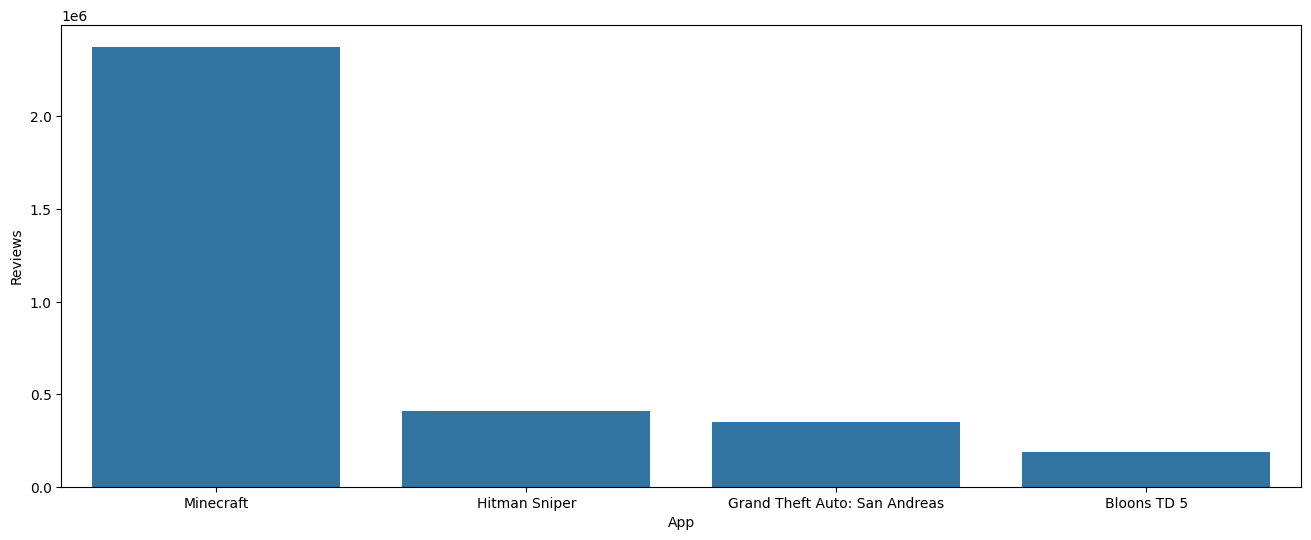

In [107]:
#plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16,6))
sns.barplot(x= "App", y="Reviews", data=df[df["Type"] == "Paid"].sort_values(by = "Reviews", ascending= False).head())